In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)
import warnings
warnings.simplefilter('ignore')
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split as tts,cross_val_score,ShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score

In [4]:
df = pd.read_csv('cust_inv_merged_final.csv')

In [5]:
master_df = df.groupby(['Make','Model','state','City','Order Type']).agg({'Total Amt Wtd Tax.' : 'mean','ServiceHours':'mean'})

In [6]:
master_df.columns = ['Average Revenue','Average Hrs']
master_df.reset_index(inplace=True)

In [7]:
master_df.shape

(36500, 7)

In [8]:
df_2016 = df[df['Year']==2016]

In [9]:
df_2016.shape

(197286, 32)

In [10]:
df_2016['Customer No.'].value_counts()

221957     333
148721     145
MFCCM03    128
412        111
E11365     111
          ... 
259194       1
203128       1
195004       1
166849       1
198826       1
Name: Customer No., Length: 131243, dtype: int64

In [11]:
#df_2016['Frequency'] = df_2016['Customer No.'].map(df_2016['Customer No.'].value_counts())

In [27]:
frequency_df = df_2016.groupby(['Order Type','Make','Model','City','Customer No.']).agg({"Invoice No":'nunique'})

In [28]:
frequency_df.columns =  ['Frequency']

In [29]:
frequency_df.reset_index(inplace=True)

In [30]:
frequency_df[frequency_df['Customer No.'] == '221957']

,Order Type,Make,Model,City,Customer No.,Frequency
39048,Paid Service,HYUNDAI,I20,thanjavur,221957,1
89045,Running Repairs,HYUNDAI,ACCENT,thanjavur,221957,2
89158,Running Repairs,HYUNDAI,CRETA,thanjavur,221957,1
90093,Running Repairs,HYUNDAI,EON,thanjavur,221957,52
90493,Running Repairs,HYUNDAI,GETZ,thanjavur,221957,2
93257,Running Repairs,HYUNDAI,I10,thanjavur,221957,94
95540,Running Repairs,HYUNDAI,I20,thanjavur,221957,75
95574,Running Repairs,HYUNDAI,I20,thiruvarur,221957,1
95834,Running Repairs,HYUNDAI,SANTA FE,thanjavur,221957,1
98241,Running Repairs,HYUNDAI,SANTRO,thanjavur,221957,33


In [31]:
merge_df1= pd.merge(df_2016,master_df,on=['Make','Model','state','City','Order Type'],how='left')

In [32]:
merged_df = pd.merge(merge_df1,frequency_df,on =['Order Type','Make','Model','City','Customer No.'],how='left')

In [19]:
merged_df[merged_df['Customer No.'] == '221957']

,Unnamed: 0,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.,Average Revenue,Average Hrs,Frequency
110885,405913,7154403125,432129,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,I10,589000,Mid Range,>5,0,8.53,0 days 08:32:50.000000000,44501,2016,8,Monsoon,200.00,0.00,0.0,0.0,0.0,200.00,513.552621,9.529597,94
110893,405921,7154403133,433124,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,VERNA,930000,Mid Range,>5,0,6.88,0 days 06:53:31.000000000,40325,2016,8,Monsoon,200.00,0.00,0.0,0.0,0.0,200.00,1272.116706,7.767412,27
110895,405923,7154403135,433449,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,I20,649000,Mid Range,01-Mar,0,3.02,0 days 03:01:49.000000000,9092,2016,8,Monsoon,200.00,0.00,0.0,0.0,0.0,200.00,305.447619,6.317403,75
110896,405924,7154403136,433233,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,XCENT,581000,Mid Range,01-Mar,0,6.43,0 days 06:26:54.000000000,12238,2016,8,Monsoon,299.99,22.72,0.0,0.0,0.0,322.71,282.039596,12.336970,42
110897,405925,7154403137,433416,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,SANTRO,457000,Budget Friendly,>5,0,3.75,0 days 03:45:40.000000000,625209,2016,8,Monsoon,299.99,29.71,0.0,0.0,0.0,329.70,807.952025,6.955190,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172577,467605,7154403775,496295,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,I20,649000,Mid Range,>5,0,8.75,0 days 08:45:30.000000000,33470,2016,10,Winter,300.00,63.81,0.0,0.0,0.0,363.81,305.447619,6.317403,75
172578,467606,7154403776,496344,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,SANTRO,457000,Budget Friendly,>5,0,8.45,0 days 08:27:26.000000000,36947,2016,10,Winter,200.00,0.00,0.0,0.0,0.0,200.00,807.952025,6.955190,33
172579,467607,7154403777,496345,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,I10,589000,Mid Range,>5,0,8.40,0 days 08:24:27.000000000,63355,2016,10,Winter,200.00,0.00,0.0,0.0,0.0,200.00,513.552621,9.529597,94
172580,467608,7154403778,496377,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,VERNA,930000,Mid Range,>5,0,8.23,0 days 08:14:15.000000000,57859,2016,10,Winter,200.00,0.00,0.0,0.0,0.0,200.00,1272.116706,7.767412,27


In [33]:
dupciate_removed_df = merged_df.drop_duplicates(subset=['Order Type','Make','Model','City','Customer No.'],keep='first')

In [34]:
dupciate_removed_df[dupciate_removed_df['Customer No.'] == '221957']

,Unnamed: 0,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.,Average Revenue,Average Hrs,Frequency
110885,405913,7154403125,432129,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,I10,589000,Mid Range,>5,0,8.53,0 days 08:32:50.000000000,44501,2016,8,Monsoon,200.00,0.00,0.0,0.0,0.0,200.00,513.552621,9.529597,94
110893,405921,7154403133,433124,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,VERNA,930000,Mid Range,>5,0,6.88,0 days 06:53:31.000000000,40325,2016,8,Monsoon,200.00,0.00,0.0,0.0,0.0,200.00,1272.116706,7.767412,27
110895,405923,7154403135,433449,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,I20,649000,Mid Range,01-Mar,0,3.02,0 days 03:01:49.000000000,9092,2016,8,Monsoon,200.00,0.00,0.0,0.0,0.0,200.00,305.447619,6.317403,75
110896,405924,7154403136,433233,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,XCENT,581000,Mid Range,01-Mar,0,6.43,0 days 06:26:54.000000000,12238,2016,8,Monsoon,299.99,22.72,0.0,0.0,0.0,322.71,282.039596,12.336970,42
110897,405925,7154403137,433416,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,SANTRO,457000,Budget Friendly,>5,0,3.75,0 days 03:45:40.000000000,625209,2016,8,Monsoon,299.99,29.71,0.0,0.0,0.0,329.70,807.952025,6.955190,33
110907,405935,7154403147,434164,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,EON,395000,Budget Friendly,01-Mar,0,4.02,0 days 04:01:49.000000000,17332,2016,8,Monsoon,200.00,0.00,0.0,0.0,0.0,200.00,561.527007,10.879197,52
114920,409948,7154403182,435248,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,CRETA,999000,Mid Range,03-May,2,64.97,2 days 16:58:16.000000000,18810,2016,8,Monsoon,0.00,0.00,0.0,0.0,0.0,0.00,0.000000,33.845000,1
114956,409984,7154403218,439601,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,ACCENT,673000,Mid Range,>5,0,4.03,0 days 04:02:40.000000000,97964,2016,8,Monsoon,200.00,0.00,0.0,0.0,0.0,200.00,2641.376000,19.210000,2
124458,419486,7154403285,446436,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,GETZ,399000,Budget Friendly,03-May,0,7.97,0 days 07:58:00.000000000,25546,2016,8,Monsoon,299.98,47.18,0.0,0.0,0.0,347.16,494.827500,3.280833,2
124471,419499,7154403298,447541,221957,Retail,1,Running Repairs,Z006,X022SA1,X022,X022 - ARASU CAR ACCESSORIES,thanjavur,Tamil Nadu,South,HYUNDAI,SANTA FE,2800000,Luxury,03-May,0,6.28,0 days 06:17:13.000000000,20975,2016,8,Monsoon,200.00,0.00,0.0,0.0,0.0,200.00,200.000000,6.280000,1


In [22]:
dupciate_removed_df.columns

Index(['Unnamed: 0', 'Invoice No', 'Job Card No', 'Customer No.', 'Cust Type',
       'Partner Type', 'Order Type', 'Data Origin', 'User ID', 'Plant',
       'Plant Name1', 'City', 'state', 'Zones', 'Make', 'Model', 'Price',
       'Model Category', 'age', 'Days', 'ServiceHours', 'Service_Time',
       'KMs Reading', 'Year', 'Month', 'Season', 'Labour Total', 'Parts Total',
       'OSL Total', 'Misc Total', 'Recovrbl Exp', 'Total Amt Wtd Tax.',
       'Average Revenue', 'Average Hrs', 'Frequency'],
      dtype='object')

In [35]:
final_df = dupciate_removed_df.drop(['Invoice No', 'Job Card No', 'Customer No.','Partner Type','Plant Name1',
                                     'state', 'Zones','age', 'Days','ServiceHours', 'Service_Time','Year', 'Month',
                                    'Price','Labour Total','Parts Total','OSL Total', 'Misc Total', 'Recovrbl Exp',
                                    'Unnamed: 0','Total Amt Wtd Tax.'],1)

In [36]:
final_df.columns

Index(['Cust Type', 'Order Type', 'Data Origin', 'User ID', 'Plant', 'City',
       'Make', 'Model', 'Model Category', 'KMs Reading', 'Season',
       'Average Revenue', 'Average Hrs', 'Frequency'],
      dtype='object')

In [37]:
final_df.shape

(161235, 14)

In [38]:
final_df['LTV'] = round((final_df['Frequency'] * final_df['Average Revenue']),2)

In [39]:
final_df =  final_df[final_df['LTV']>0]

In [40]:
final_df.shape

(159386, 15)

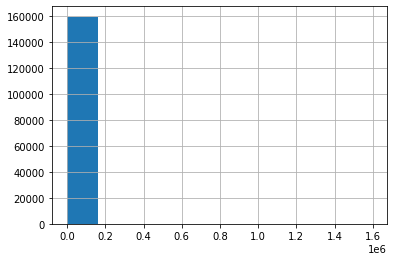

In [41]:
final_df['LTV'].hist()

In [42]:
print("0.05 quantile :-",final_df['LTV'].quantile(0.05))
print("0.25 quantile :-",final_df['LTV'].quantile(0.25))
print("0.50 quantile :-",final_df['LTV'].quantile(0.50))
print("0.75 quantile :-",final_df['LTV'].quantile(0.75))
print("0.95 quantile :-",final_df['LTV'].quantile(0.95))
print("minimum LTV :-",final_df['LTV'].min())
print("maximum LTV :-",final_df['LTV'].max())
print("mean LTV :-",final_df['LTV'].mean())

0.05 quantile :- 376.43
0.25 quantile :- 1449.51
0.50 quantile :- 2883.36
0.75 quantile :- 5444.07
0.95 quantile :- 16939.39
minimum LTV :- 0.01
maximum LTV :- 1593623.29
mean LTV :- 5189.063807423652


In [43]:
print(final_df[final_df['LTV']<=2883.36].shape)
print(final_df[(final_df['LTV']>2883.36 ) & (final_df['LTV']<=5444.07)].shape)
print(final_df[final_df['LTV']>5444.07].shape)

(79706, 15)
(39836, 15)
(39844, 15)


In [44]:
bins=[-1,2883.36,5444.07,1593623.29]
labels=['Low','Medium','High']
final_df['Customer Category']=pd.cut(final_df['LTV'], bins=bins, labels=labels)

In [45]:
final_df['Customer Category'].value_counts()

Low       79706
High      39844
Medium    39836
Name: Customer Category, dtype: int64

In [46]:
final_df.head()

,Cust Type,Order Type,Data Origin,User ID,Plant,City,Make,Model,Model Category,KMs Reading,Season,Average Revenue,Average Hrs,Frequency,LTV,Customer Category
0,Retail,SMC Value Package,Z005,BC01SA2,BC01,thane,MARUTI SUZUKI,ZEN ESTILO,Budget Friendly,35654,Winter,3166.237333,23.585333,1,3166.24,Medium
1,Retail,Running Repairs,Z001,BC01SA2,BC01,thane,MARUTI SUZUKI,SWIFT,Budget Friendly,70730,Winter,2485.665090,45.172803,1,2485.67,Low
2,Retail,SMC Redemption,Z005,BC01SA2,BC01,thane,MARUTI SUZUKI,ZEN ESTILO,Budget Friendly,163215,Winter,60.363636,150.801818,1,60.36,Low
3,Retail,Running Repairs,Z001,BC01SA2,BC01,thane,FIAT,PALIO,Budget Friendly,50220,Winter,2708.158077,112.535769,1,2708.16,Low
4,Retail,Paid Service,Z001,BC01SA2,BC01,thane,MARUTI SUZUKI,SWIFT,Budget Friendly,79061,Winter,4085.619921,63.472823,1,4085.62,Medium


In [47]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [48]:
model_df =  final_df.copy()

In [49]:
le=LabelEncoder()
model_df["Cust Type"]=le.fit_transform(model_df["Cust Type"])
model_df["Order Type"]=le.fit_transform(model_df["Order Type"])
model_df["Data Origin"]=le.fit_transform(model_df["Data Origin"])
model_df["User ID"]=le.fit_transform(model_df["User ID"])
model_df["Plant"]=le.fit_transform(model_df["Plant"])
model_df["City"]=le.fit_transform(model_df["City"])
model_df["Make"]=le.fit_transform(model_df["Make"])
model_df["Model"]=le.fit_transform(model_df["Model"])
model_df["Model Category"]=le.fit_transform(model_df["Model Category"])
model_df["Season"]=le.fit_transform(model_df["Season"])
model_df["Customer Category"]=le.fit_transform(model_df["Customer Category"])

In [50]:
model_df.head()

,Cust Type,Order Type,Data Origin,User ID,Plant,City,Make,Model,Model Category,KMs Reading,Season,Average Revenue,Average Hrs,Frequency,LTV,Customer Category
0,5,5,4,3,0,160,13,232,0,35654,2,3166.237333,23.585333,1,3166.24,2
1,5,3,0,3,0,160,13,192,0,70730,2,2485.665090,45.172803,1,2485.67,1
2,5,4,4,3,0,160,13,232,0,163215,2,60.363636,150.801818,1,60.36,1
3,5,3,0,3,0,160,3,147,0,50220,2,2708.158077,112.535769,1,2708.16,1
4,5,2,0,3,0,160,13,192,0,79061,2,4085.619921,63.472823,1,4085.62,2


In [51]:
X = model_df.drop(['Customer Category','Frequency','LTV'],1)
y= model_df['Customer Category']

In [52]:
X.columns

Index(['Cust Type', 'Order Type', 'Data Origin', 'User ID', 'Plant', 'City',
       'Make', 'Model', 'Model Category', 'KMs Reading', 'Season',
       'Average Revenue', 'Average Hrs'],
      dtype='object')

In [53]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

In [54]:
from sklearn.model_selection import GridSearchCV, cross_val_score,RandomizedSearchCV

#### Decision Tree Baseline Model

In [56]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     12027
           1       0.92      0.91      0.91     23957
           2       0.75      0.75      0.75     11832

    accuracy                           0.85     47816
   macro avg       0.83      0.83      0.83     47816
weighted avg       0.85      0.85      0.85     47816



In [58]:
print(" Testing Accuracy :-" , accuracy_score(y_test,y_pred_dt))
print("Training Accuracy :-" ,accuracy_score(y_train,y_pred_dt_train))

 Testing Accuracy :- 0.8531244771624561
Training Accuracy :- 0.9999282961369543


In [59]:
dt_cv_score=cross_val_score(estimator=dt,X=X,y=y,cv=5)
print(dt_cv_score.var())
print(dt_cv_score.mean())

0.001637284198118007
0.8256500093449454


### Hyper Parameter Tuned Decision Tree

In [151]:
tree_params = {'max_depth': range(2, 11),
              'criterion' :['gini', 'entropy']}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  

locally_best_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [152]:
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'criterion': 'gini', 'max_depth': 2}
Best cross validaton score 0.9120552119745451


In [60]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     12027
           1       0.90      1.00      0.95     23957
           2       0.86      0.84      0.85     11832

    accuracy                           0.91     47816
   macro avg       0.92      0.88      0.90     47816
weighted avg       0.92      0.91      0.91     47816



In [66]:
print("Testing Accuracy :-" , accuracy_score(y_test,y_pred_dt))
print("Training Accuracy :-" ,accuracy_score(y_train,y_pred_dt_train))

Testing Accuracy :- 0.9122469466287435
Training Accuracy :- 0.9120552119745451


<BarContainer object of 13 artists>

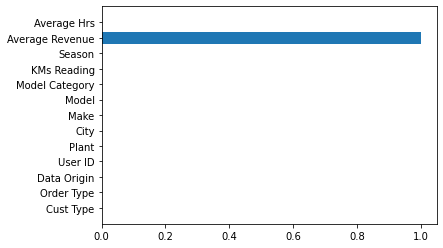

In [62]:
plt.barh(list(X),list(dt.feature_importances_))

In [76]:
#dt_cv_score=cross_val_score(estimator=dt,X=X,y=y,cv=5)
print(dt_cv_score.std())
print(dt_cv_score.mean())

0.03723326057237626
0.9119373652455293


#### Random Forest Classifier

In [65]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88     12027
           1       0.91      0.97      0.94     23957
           2       0.83      0.81      0.82     11832

    accuracy                           0.90     47816
   macro avg       0.89      0.87      0.88     47816
weighted avg       0.90      0.90      0.89     47816



In [67]:
print("Testing Accuracy :-" , accuracy_score(y_test,y_pred_rf))
print("Training Accuracy :-" ,accuracy_score(y_train,y_pred_rf_train))

Testing Accuracy :- 0.8953279237075455
Training Accuracy :- 0.9998745182396701


In [123]:
rfc = RandomForestClassifier(random_state=2)
param_grid = { 
'max_depth' : range(2,11),
'criterion' :['gini', 'entropy']
    
}
rs_model = RandomizedSearchCV(rfc, param_distributions=param_grid)
rs_model.fit(X_train, y_train)

rs_model.best_params_

{'max_depth': 10, 'criterion': 'gini'}

In [68]:
rfc=RandomForestClassifier(criterion='gini',max_depth=10,random_state=0)

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [70]:
y_pred_rfc=rfc.predict(X_test)
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     12027
           1       0.90      1.00      0.95     23957
           2       0.86      0.84      0.85     11832

    accuracy                           0.91     47816
   macro avg       0.92      0.88      0.90     47816
weighted avg       0.92      0.91      0.91     47816



In [71]:
accuracy_score(y_test,y_pred_rfc)

0.9121842061234733

<BarContainer object of 13 artists>

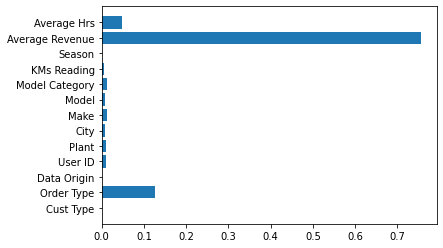

In [72]:
plt.barh(list(X),list(rfc.feature_importances_))

In [73]:
score=cross_val_score(estimator=rfc,X=X,y=y,cv=5)

In [74]:
score.mean()

0.9119185428971276

In [75]:
score.std()

0.03722808016501287

#### XGB Classifier

In [77]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [78]:
y_pred_xgb = xgb.predict(X_test)

In [79]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     12027
           1       0.90      1.00      0.95     23957
           2       0.86      0.84      0.85     11832

    accuracy                           0.91     47816
   macro avg       0.92      0.88      0.90     47816
weighted avg       0.92      0.91      0.91     47816



In [80]:
accuracy_score(y_test,y_pred_xgb)

0.9122051196252301

In [81]:
xgb_cross_score=cross_val_score(estimator=xgb,X=X,y=y,cv=5)

In [82]:
xgb_cross_score.mean() 

0.911912268780994

In [83]:
xgb_cross_score.std()

0.03720792420620373